# Scanning The Operating Parameters

First we set up the FPE:

In [2]:
from tessfpe.dhu.fpe import FPE
from tessfpe.dhu.unit_tests import check_house_keeping_voltages
fpe1 = FPE(1, debug=False, preload=True, FPE_Wrapper_version='6.1.1')
print fpe1.version
if check_house_keeping_voltages(fpe1):
    print "Wrapper load complete. Interface voltages OK."

Observatory Simulator Version 1.6c - Oct  8 2015 11:55:03
Wrapper load complete. Interface voltages OK.


We now walk through setting each value from its high to its low.

In [14]:
data = []

for i in range(100,0,-1):
    set_values = {}
    for k in range(len(fpe1.ops.address)):
        if fpe1.ops.address[k] is None:
            continue
        low = fpe1.ops.address[k].low
        high = fpe1.ops.address[k].high
        name = fpe1.ops.address[k].name
        set_values[name] = fpe1.ops.address[k].value = low + i / 100. * (high - low)
    fpe1.ops.send()
    data.append({"set values": set_values,
                 "measured values": fpe1.house_keeping["analogue"]})

In [12]:
fpe1.ops.heater_1_current = fpe1.ops.heater_2_current = fpe1.ops.heater_3_current = fpe1.ops.heater_3_current.low
fpe1.ops.send()

In [24]:
min_values = {}
max_values = {}
for datum in data:
    for k in range(len(fpe1.ops.address)):
        if fpe1.ops.address[k] is None:
            continue
        name = fpe1.ops.address[k].name
        if name not in min_values or \
           min_values[name] > datum["measured values"][name]:
            min_values[name] = datum["measured values"][name]
        if name not in max_values or \
           max_values[name] < datum["measured values"][name]:
            max_values[name] = datum["measured values"][name]

for k in range(len(fpe1.ops.address)):
    if fpe1.ops.address[k] is None:
        continue
    name = fpe1.ops.address[k].name
    unit = fpe1.ops.address[k].unit
    expected_low = fpe1.ops.address[k].low
    actual_minimum = min_values[name]
    expected_high = fpe1.ops.address[k].high
    actual_maximum = max_values[name]
    if expected_low < expected_high:
        actual_low = actual_minimum
        actual_high = actual_maximum
    else:
        actual_high = actual_minimum
        actual_low = actual_maximum
    
    print "{name}:".format(name = name)
    print "\tExpected Low: {expected_low} {unit}".format(expected_low=expected_low,
                                                         unit=unit)
    print "\tActual Low: {actual_low} {unit}".format(actual_low=actual_low,
                                                     unit=unit)
    print "\tExpected High: {expected_high} {unit}".format(expected_high=expected_high,
                                                            unit=unit)
    print "\tActual High: {actual_high} {unit}".format(actual_high=actual_high,
                                                       unit=unit)
    print

ccd1_output_gate:
	Expected Low: -8.0 V
	Actual Low: -7.85371398926 V
	Expected High: 4.0 V
	Actual High: 6.55558776855 V

ccd1_input_gate_1:
	Expected Low: -8.0 V
	Actual Low: -7.75199890137 V
	Expected High: 4.0 V
	Actual High: 6.98561096191 V

ccd1_input_gate_2:
	Expected Low: -8.0 V
	Actual Low: -7.72480773926 V
	Expected High: 4.0 V
	Actual High: 6.52587890625 V

ccd1_scupper:
	Expected Low: 0.0 V
	Actual Low: 0.195877075195 V
	Expected High: 15.0 V
	Actual High: 16.5 V

ccd1_reset_drain:
	Expected Low: 0.0 V
	Actual Low: 0.168685913086 V
	Expected High: 15.0 V
	Actual High: 16.5 V

ccd1_backside:
	Expected Low: 0.0 V
	Actual Low: 0.064453125 V
	Expected High: 5.0 V
	Actual High: 8.00729370117 V

ccd1_substrate:
	Expected Low: 0.0 V
	Actual Low: -0.715698242188 V
	Expected High: -50.0 V
	Actual High: -80.7838134766 V

ccd1_output_drain_a:
	Expected Low: 0.0 V
	Actual Low: 0.31408996582 V
	Expected High: 10.0 V
	Actual High: 27.3 V

ccd1_output_drain_b:
	Expected Low: 0.0 V
	Actual

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from collections import defaultdict

# Collect the set and measured values
X = defaultdict(list)
Y = defaultdict(list)
for datum in data:
    for name in datum['set values']:
        X[name].append(datum['set values'][name])
        Y[name].append(datum['measured values'][name])

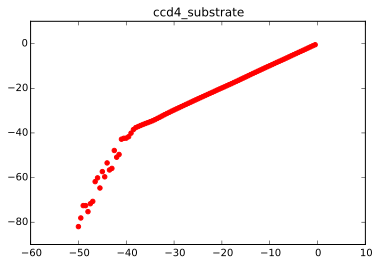

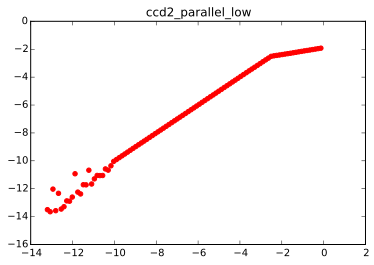

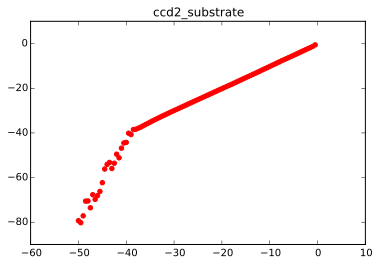

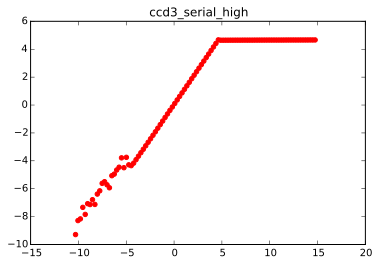

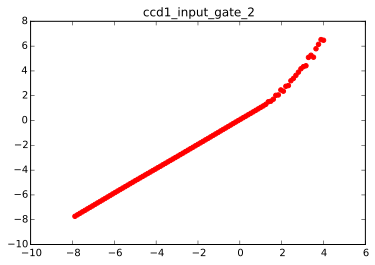

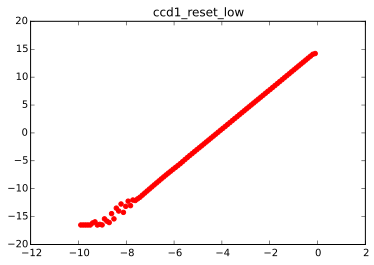

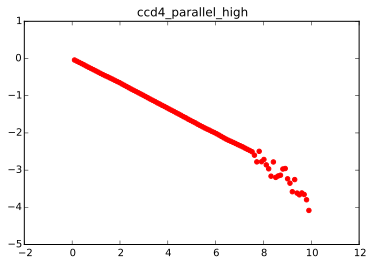

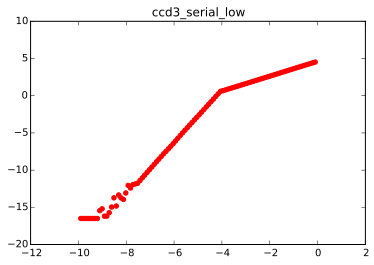

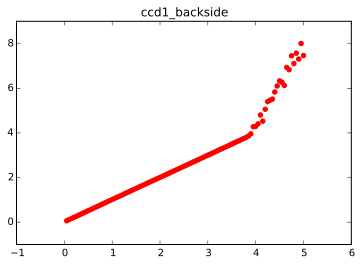

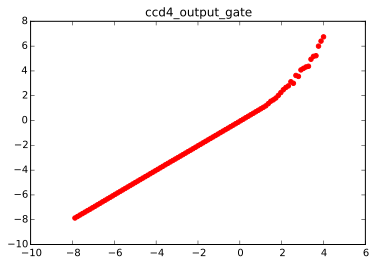

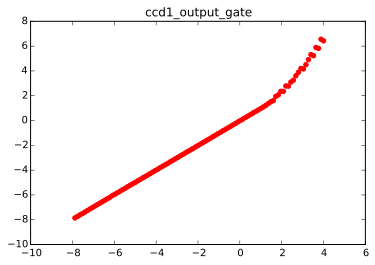

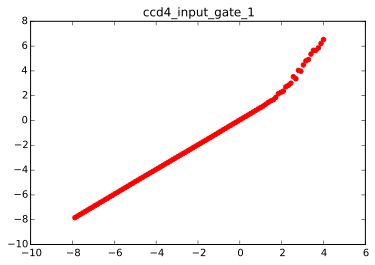

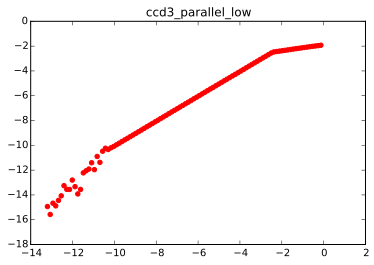

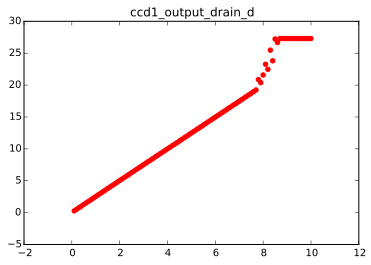

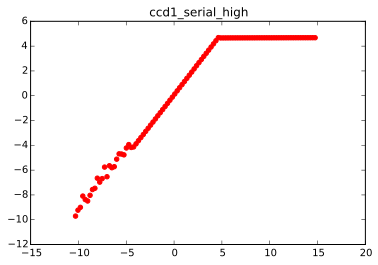

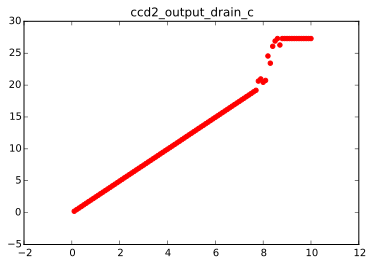

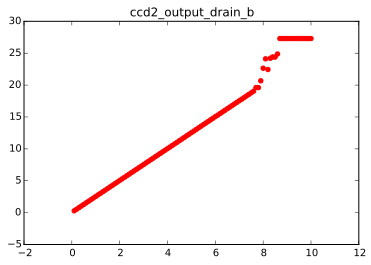

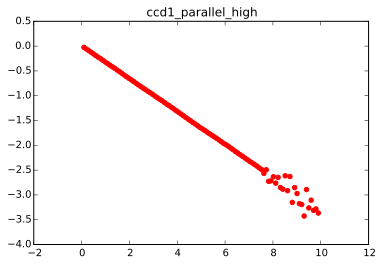

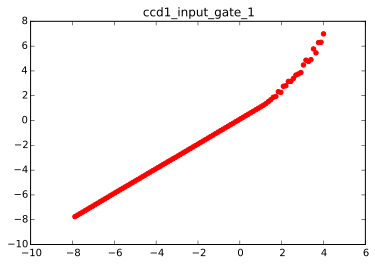

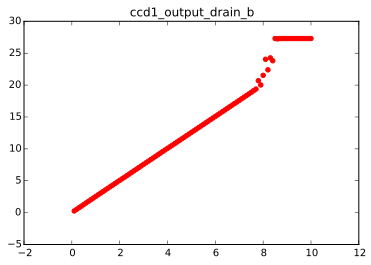

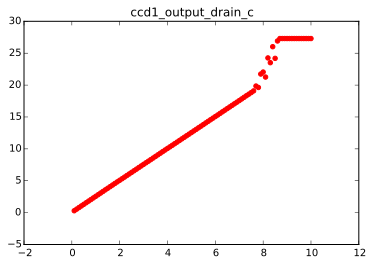

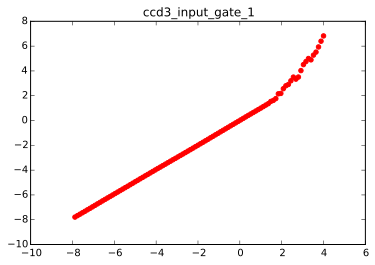

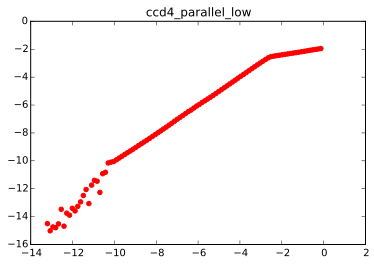

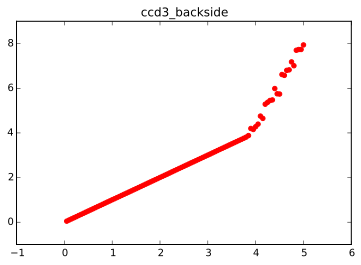

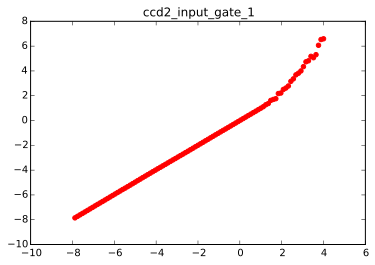

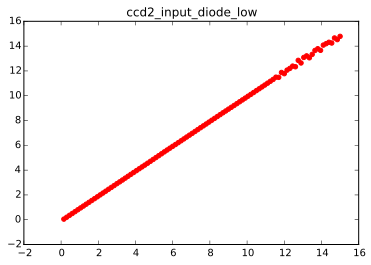

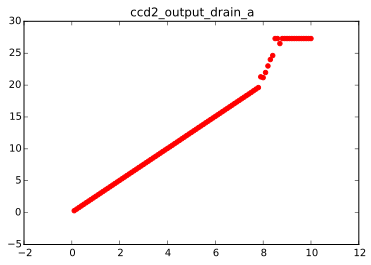

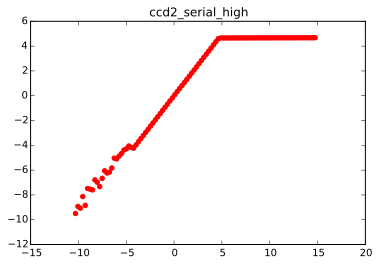

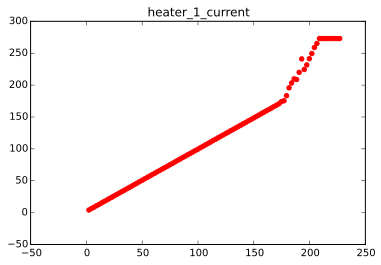

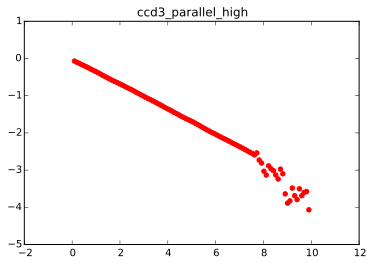

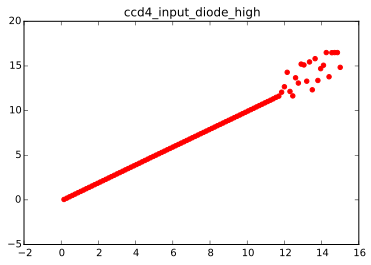

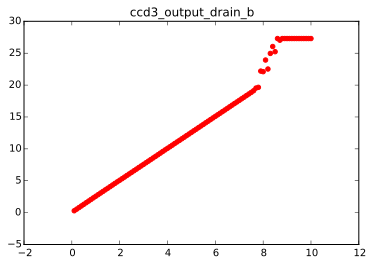

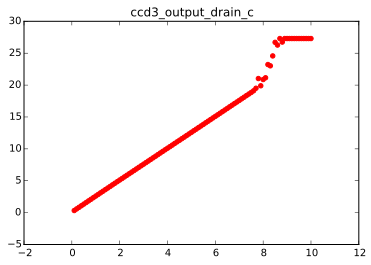

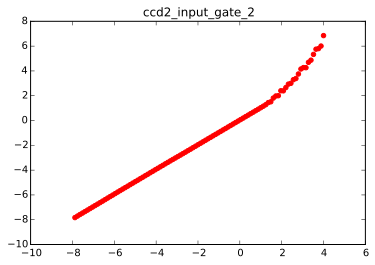

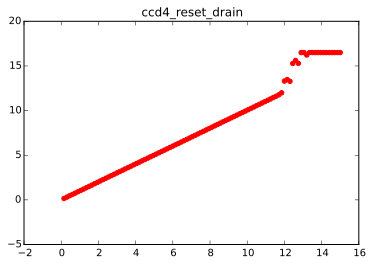

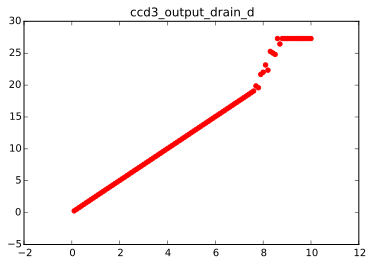

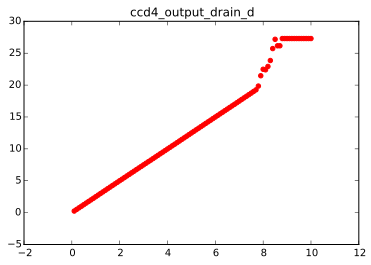

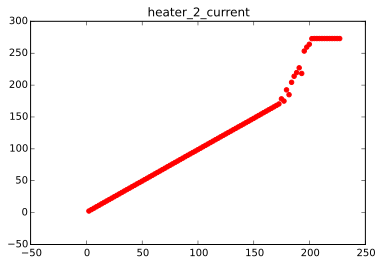

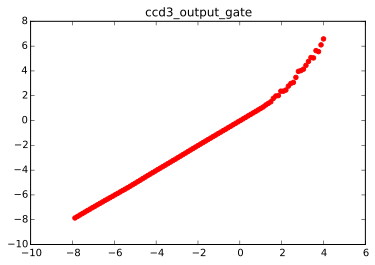

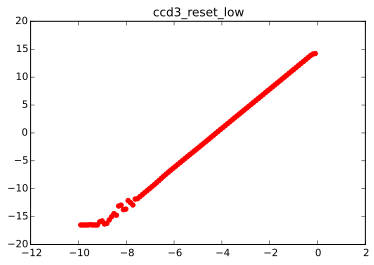

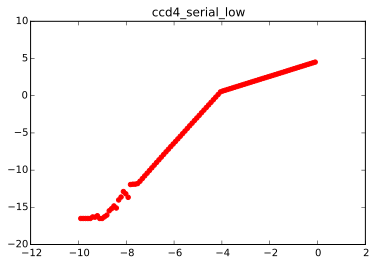

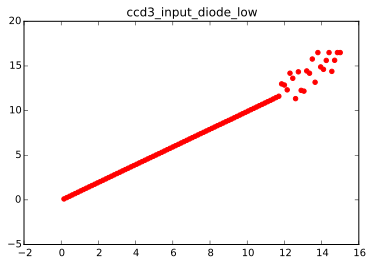

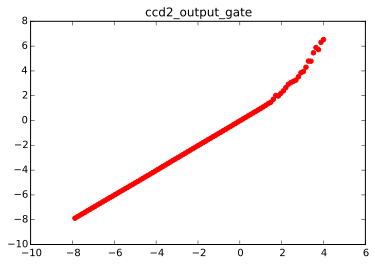

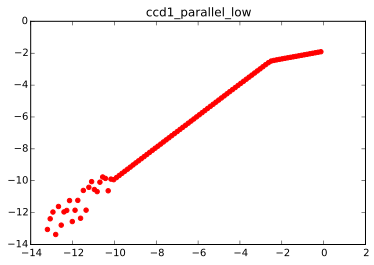

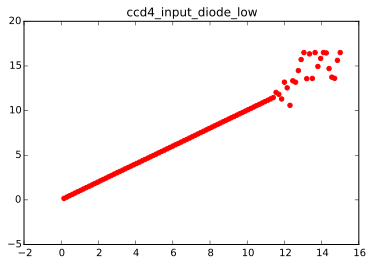

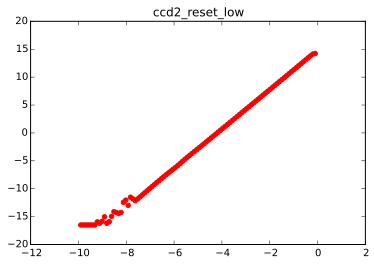

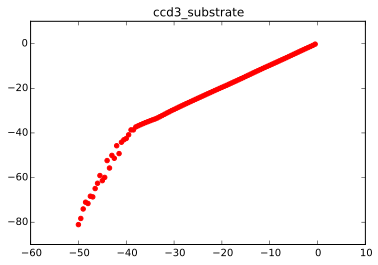

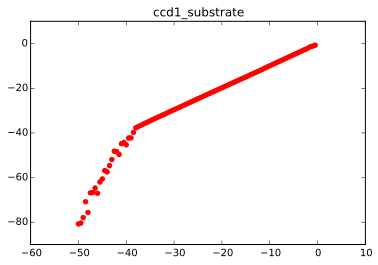

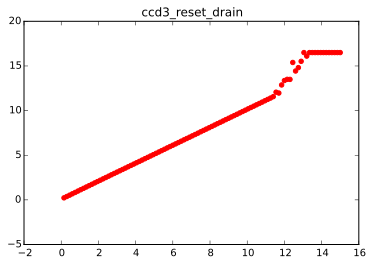

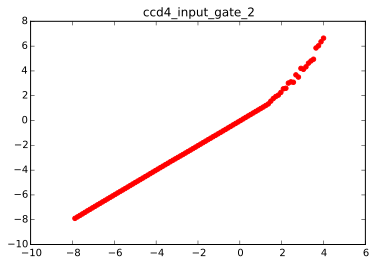

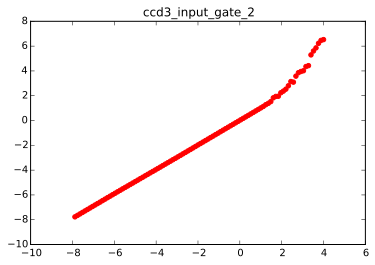

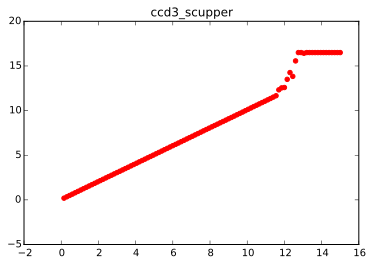

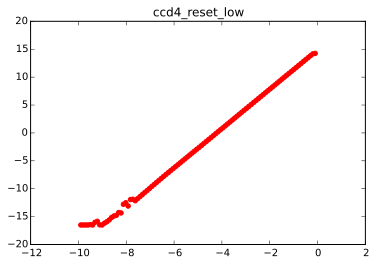

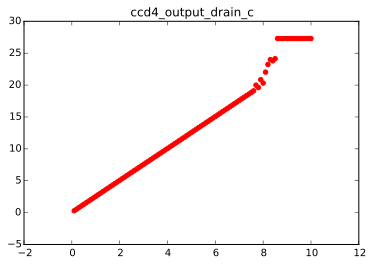

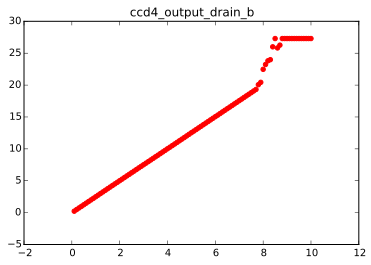

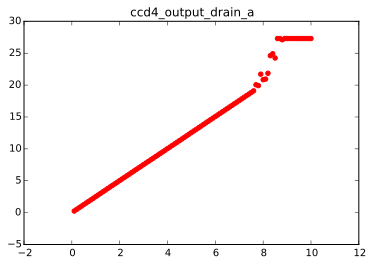

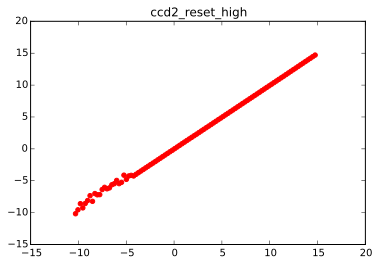

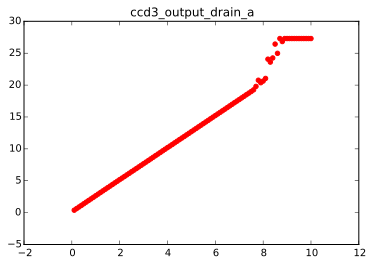

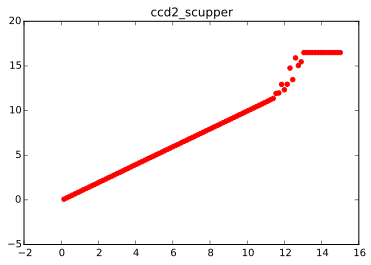

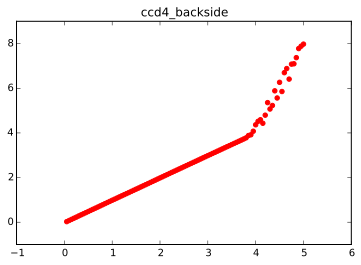

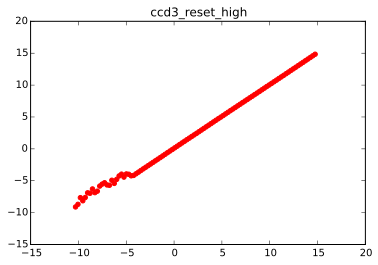

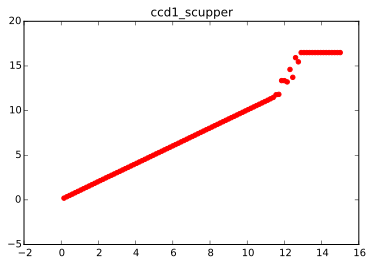

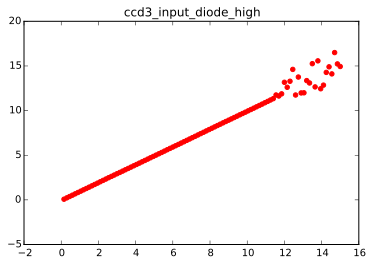

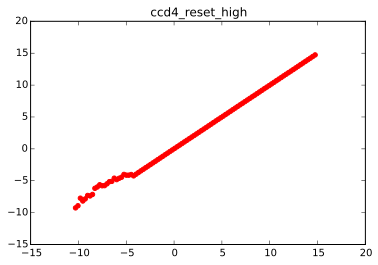

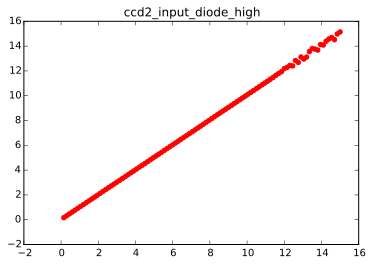

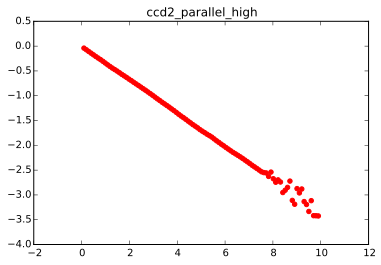

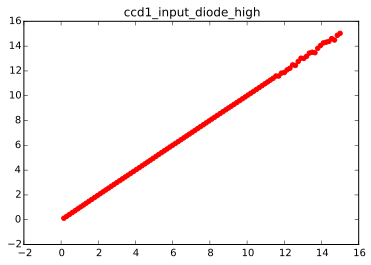

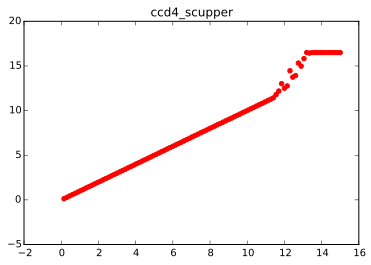

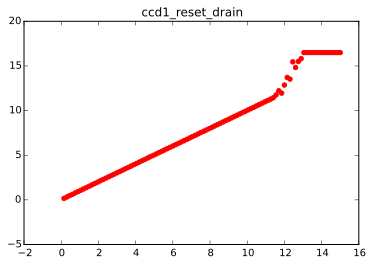

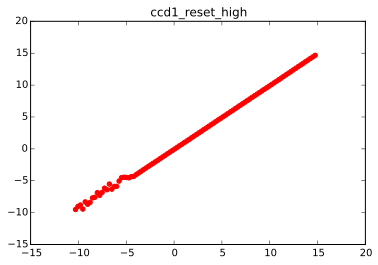

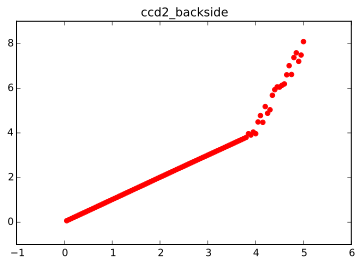

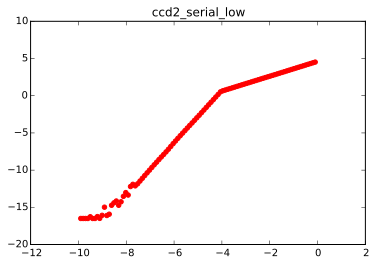

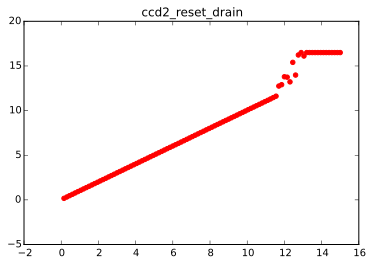

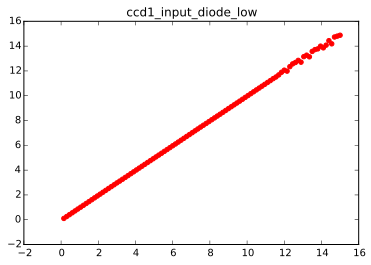

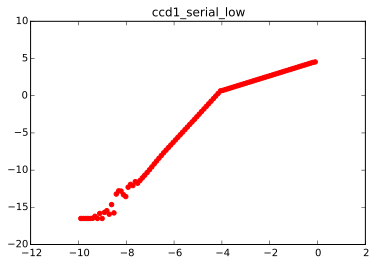

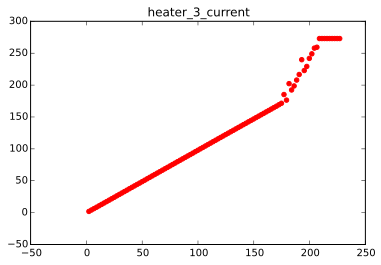

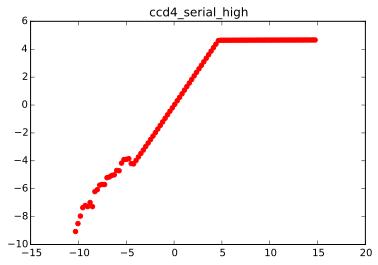

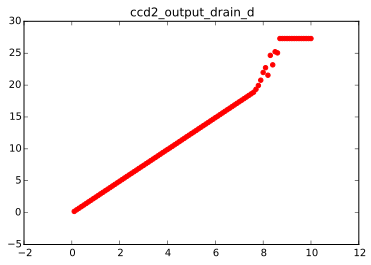

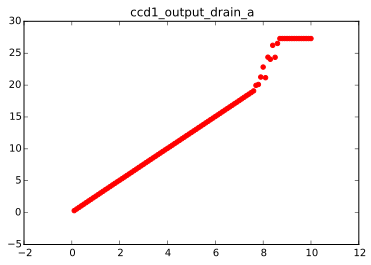

In [31]:
# Plot the set vs. measured values
for nom in X:
    x = X[nom]
    y = Y[nom]
    plt.title(nom)
    plt.scatter(x,y,color='red')
    plt.show()